In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import illustris_python as il
import h5py
import pandas as pd
from tqdm.notebook import tqdm#barrita
#importar funciones de circularidad
from circularity import spherical_coords_from_vector             #formato: spherical_coords_from_vector(vector)
from circularity import matrix_from_spherical                    #formato: matrix_from_spherical(r,theta,phi)
from circularity import inertia_tensor                           #formato: inertia_tensor(Masas, Coordenadas, Centralpos)
from circularity import diagonalization_of_inertia               #formato: diagonalization_of_inertia(I)
from circularity import star_particles_rotated_once_eulermethod  #formato: star_particles_rotated_once_eulermethod(subhaloid, snapshotnum, basepath,radius_limit,minmetal,maxmetal)
from circularity import star_particles_rotated_once              #formato: star_particles_rotated_once(subhaloid, snapshotnum, basepath,radius_limit,minmetal,maxmetal)
from circularity import circularities_eulermethod                #formato: circularities_eulermethod(subhaloID,snapNum,basepath,radius_limit,metallicity_cutoff,radius_limit_rotation,minmetal_rotation,maxmetal_rotation)
from circularity import circularities_diagmethod                 #formato: circularities_diagmethod(subhaloID,snapNum,basepath,radius_limit,metallicity_cutoff,radius_limit_rotation,minmetal_rotation,maxmetal_rotation)



In [3]:


#(ID, MASS, R200)
#(394621, 3.4533272e+12, 228.1541748046875)
#(402555, 2.9701266e+12, 197.39179992675781)
#(436932, 2.7373569e+12, 199.83599853515625)
SubhaloID = 436932import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import illustris_python as il
Mass = 2.7373569e+12
R200 = 199.83599853515625

snapNum = 99
basepath = '/home/tnguser/sims.TNG/TNG50-1/output'

stars = circularities_eulermethod(SubhaloID,snapNum,basepath,radius_limit=1.0*R200,minmetal=0.05,maxmetal=3.0,radius_limit_rotation=0.2*R200,minmetal_rotation=0.95,maxmetal_rotation=1.5)
#star = star_particles_rotated_once_eulermethod(SubhaloID, snapNum, basepath,0.2*R200/0.667,0.95,1.5)


13.2094931705
[[ -4.68731785e-07  -9.98654351e-08   2.11881414e+09]]
-----------------------
 [ -9.83619521e+07  -7.58134530e+07   9.10080185e+09]


In [4]:
stars.keys()

dict_keys(['count', 'Masses', 'Coordinates', 'Velocities', 'GFM_Metallicity', 'Potential', 'GFM_StellarFormationTime', 'ParticleIDs', 'Distance_to_center', 'Angular_Momentum', 'Specific_Energy', 'Circularity'])

In [5]:


stars_df = pd.DataFrame()

stars_df['M'] = stars['Masses']
stars_df['x'] = stars['Coordinates'][:,0]
stars_df['y'] = stars['Coordinates'][:,1]
stars_df['z'] = stars['Coordinates'][:,2]
stars_df['Vx'] = stars['Velocities'][:,0]
stars_df['Vy'] = stars['Velocities'][:,1]
stars_df['Vz'] = stars['Velocities'][:,2]
stars_df['Metallicity'] = stars['GFM_Metallicity']
stars_df['U'] = stars['Potential']
stars_df['StellarFormationTime'] = stars['GFM_StellarFormationTime']
stars_df['R'] = stars['Distance_to_center']
stars_df['Wx'] = stars['Angular_Momentum'][:,0]
stars_df['Wy'] = stars['Angular_Momentum'][:,1]
stars_df['Wz'] = stars['Angular_Momentum'][:,2]
stars_df['Specific_energy'] = stars['Specific_Energy']
stars_df['Circularity'] = stars['Circularity']
stars_df['ParticleIDs'] = stars['ParticleIDs']

stars_df.to_csv('subhalo_circularity_data/subhalo%s_02R200_02R200.csv'%SubhaloID)

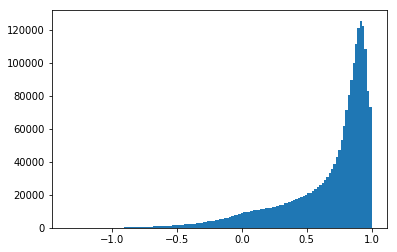

In [6]:
plt.hist(stars['Circularity'],bins=128)
plt.show()

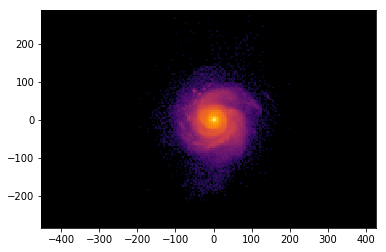

In [7]:
plt.hist2d(stars['Coordinates'][:,0],stars['Coordinates'][:,1],bins=128,cmap='inferno',norm=mpl.colors.LogNorm())
plt.axis('equal')
ax = plt.gca()
ax.set_facecolor('black')
plt.show()

In [8]:
len(np.where(stars['Circularity'] <= -0.7)[0])

5636

# Iterative process going trough every subhalo

In [15]:
#So the idea is using the ids and r200 inside Classified_subhalos_TNG50-1 and make their own tables with circularities for every single one

Classified_subhalos = np.genfromtxt('Classified_subhalos_TNG50-1.csv',skip_header=1,delimiter=',')
#Classified_subhalos[:,1] IDs
#Classified_subhalos[:,2] MASAS
#Classified_subhalos[:,3] R200

snapNum = 99
basepath = '/home/tnguser/sims.TNG/TNG50-1/output'


total = 0
for i in tqdm(range(250,len(Classified_subhalos[:,1]))):
    total += 1
    subhaloID = Classified_subhalos[i,1]
    print(subhaloID)
    R200 = Classified_subhalos[i,3]
    stars = circularities_eulermethod(subhaloID,snapNum,basepath,radius_limit=1.0*R200,minmetal=0.01,maxmetal=3.0,radius_limit_rotation=0.2*R200,minmetal_rotation=0.95,maxmetal_rotation=1.5)
    
    #to dataframe
    stars_df = pd.DataFrame()
    stars_df['M'] = stars['Masses']
    stars_df['x'] = stars['Coordinates'][:,0]
    stars_df['y'] = stars['Coordinates'][:,1]
    stars_df['z'] = stars['Coordinates'][:,2]
    stars_df['Vx'] = stars['Velocities'][:,0]
    stars_df['Vy'] = stars['Velocities'][:,1]
    stars_df['Vz'] = stars['Velocities'][:,2]
    stars_df['Metallicity'] = stars['GFM_Metallicity']
    stars_df['U'] = stars['Potential']
    stars_df['StellarFormationTime'] = stars['GFM_StellarFormationTime']
    stars_df['R'] = stars['Distance_to_center']
    stars_df['Jx'] = stars['Angular_Momentum'][:,0]
    stars_df['Jy'] = stars['Angular_Momentum'][:,1]
    stars_df['Jz'] = stars['Angular_Momentum'][:,2]
    stars_df['Total Energy'] = stars['Specific_Energy'] #i wrongly called it specific energy dont knuw why
    stars_df['Circularity'] = stars['Circularity']
    stars_df['ParticleIDs'] = stars['ParticleIDs']
    
    stars_df.to_csv('subhalo_tables/subhalo%s.csv'%subhaloID)
    
    #CounterCSV
    wStars = np.where( stars['Circularity'] <= -0.7 )
    
    counter_stars = {}
    counter_stars['Masses'] = stars['Masses'][wStars]
    counter_stars['Coordinates'] = stars['Coordinates'][wStars]
    counter_stars['Velocities'] = stars['Velocities'][wStars]
    counter_stars['GFM_Metallicity'] = stars['GFM_Metallicity'][wStars]
    counter_stars['Potential'] = stars['Potential'][wStars]
    counter_stars['GFM_StellarFormationTime'] = stars['GFM_StellarFormationTime'][wStars]
    counter_stars['Distance_to_center'] = stars['Distance_to_center'][wStars]
    counter_stars['Angular_Momentum'] = stars['Angular_Momentum'][wStars]
    counter_stars['Total Energy'] = stars['Specific_Energy'][wStars]
    counter_stars['Circularity'] = stars['Circularity'][wStars]
    counter_stars['ParticleIDs'] = stars['ParticleIDs'][wStars]
    
    counter_stars_df = pd.DataFrame()
    counter_stars_df['M'] = counter_stars['Masses']
    counter_stars_df['x'] = counter_stars['Coordinates'][:,0]
    counter_stars_df['y'] = counter_stars['Coordinates'][:,1]
    counter_stars_df['z'] = counter_stars['Coordinates'][:,2]
    counter_stars_df['Vx'] = counter_stars['Velocities'][:,0]
    counter_stars_df['Vy'] = counter_stars['Velocities'][:,1]
    counter_stars_df['Vz'] = counter_stars['Velocities'][:,2]
    counter_stars_df['Metallicity'] = counter_stars['GFM_Metallicity']
    counter_stars_df['U'] = counter_stars['Potential']
    counter_stars_df['StellarFormationTime'] = counter_stars['GFM_StellarFormationTime']
    counter_stars_df['R'] = counter_stars['Distance_to_center']
    counter_stars_df['Jx'] = counter_stars['Angular_Momentum'][:,0]
    counter_stars_df['Jy'] = counter_stars['Angular_Momentum'][:,1]
    counter_stars_df['Jz'] = counter_stars['Angular_Momentum'][:,2]
    counter_stars_df['Total Energy'] = counter_stars['Total Energy'] #i wrongly called it specific energy dont knuw why
    counter_stars_df['Circularity'] = counter_stars['Circularity']
    counter_stars_df['ParticleIDs'] = counter_stars['ParticleIDs']
    
    counter_stars_df.to_csv('subhalo_tables/subhalo%s_counterrotating.csv'%subhaloID)
    
    
    
print(total,len(Classified_subhalos[:,1]))

  0%|          | 0/11 [00:00<?, ?it/s]

627572.0
4.45629670196
[[ -4.53297174e-09   4.39495499e-09   3.17012284e+07]]
-----------------------
 [  -249108.45349169    509128.48691214  98575997.68184441]
628031.0
2.22814975883
[[  4.54577540e-10   5.47555527e-10   8.20555303e+06]]
-----------------------
 [ -5.44132624e+05  -9.53327677e+03   3.76137742e+07]
628378.0
6.86994449394
[[ -1.62399900e-10   9.79895094e-10   9.51910008e+06]]
-----------------------
 [ -2.03299220e+04  -2.55267701e+06   6.01257393e+07]
628949.0
4.9571956991
[[ -4.88934274e-09   4.50719628e-10   2.43548919e+07]]
-----------------------
 [ -5.08147251e+04   1.20381208e+05   9.30669153e+07]
629266.0
7.6658655441
[[  4.03413002e-09  -2.96897033e-09   3.89250616e+07]]
-----------------------
 [  6.86959352e+05   6.73962472e+04   1.49747223e+08]
630155.0
3.92289795076
[[ -1.03560302e-09  -1.93811099e-09   1.69717806e+07]]
-----------------------
 [   312369.07098794   -133035.42467076  68380149.53741507]
630975.0
5.47636606298
[[  9.95386057e-09   9.74506180

# Trabajando al cuethe :D

(2131748, 2131748)